In [87]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


In [88]:
df=pd.read_csv("bhp.csv")

In [89]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft'>

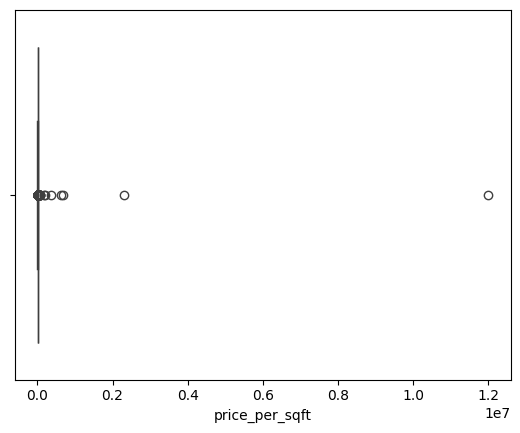

In [90]:
sns.boxplot(x=df['price_per_sqft'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [92]:
upper_limit= df.price_per_sqft.mean()+ 4*df.price_per_sqft.std()

In [93]:
lower_limit= df.price_per_sqft.mean()- 4*df.price_per_sqft.std()

In [94]:
df= df[(df.price_per_sqft<upper_limit)|(df.price_per_sqft>lower_limit)]

In [95]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [96]:
df = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]

<Axes: xlabel='price_per_sqft', ylabel='Count'>

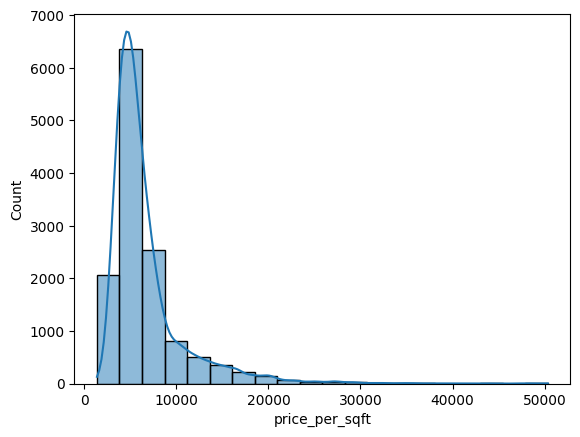

In [97]:
sns.histplot(df['price_per_sqft'], kde=True, bins =20)

<Axes: xlabel='price_per_sqft'>

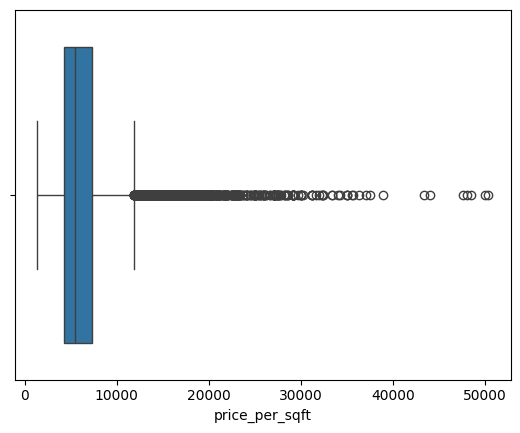

In [98]:
sns.boxplot(x=df['price_per_sqft'])

In [99]:
df['zscore'] = (df.price_per_sqft-df.price_per_sqft.mean())/df.price_per_sqft.std()
df.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
778,other,6 Bedroom,600.0,4.0,65.00,6,10833,1.006840
6402,Indira Nagar,2 BHK,1260.0,2.0,100.00,2,7936,0.307254
2661,Devanahalli,2 BHK,1080.0,2.0,53.35,2,4939,-0.416480
10416,Vittasandra,3 BHK,1650.0,3.0,85.50,3,5181,-0.358041
8822,other,3 BHK,1620.0,3.0,95.00,3,5864,-0.193105
6965,other,2 Bedroom,1800.0,2.0,300.00,2,16666,2.415430
5822,Hennur Road,2 BHK,1414.0,2.0,84.18,2,5953,-0.171613
2881,Hoskote,3 BHK,1225.0,3.0,40.00,3,3265,-0.820729
9258,Hennur,2 BHK,1255.0,2.0,52.32,2,4168,-0.602666
999,Whitefield,4 BHK,2268.0,3.0,163.00,4,7186,0.126139


In [100]:
outliers_z = df[(df.zscore < -4) | (df.zscore>4)]
outliers_z.shape

(125, 8)

In [101]:
df=df[(df.zscore>-4)|(df.zscore<4)]

In [102]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [103]:
13200 - 12874

326

<Axes: xlabel='price_per_sqft', ylabel='Count'>

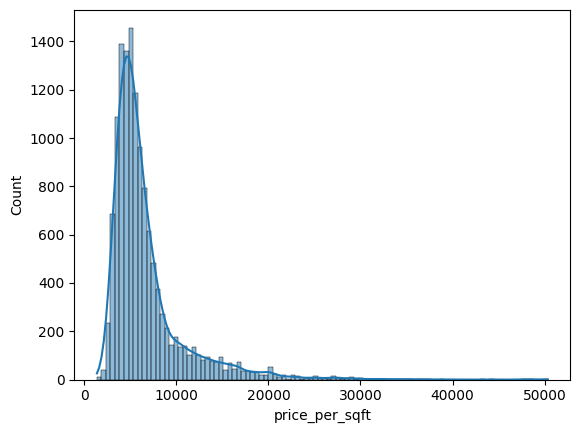

In [104]:
sns.histplot(df['price_per_sqft'], kde=True, bins=100)

<Axes: xlabel='price_per_sqft'>

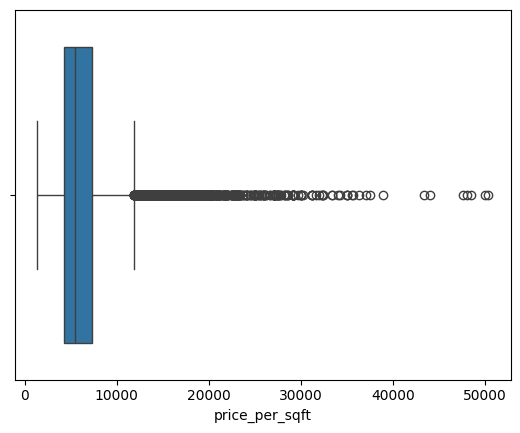

In [105]:
sns.boxplot(x=df['price_per_sqft'])